Prediction accuracy: 1.0


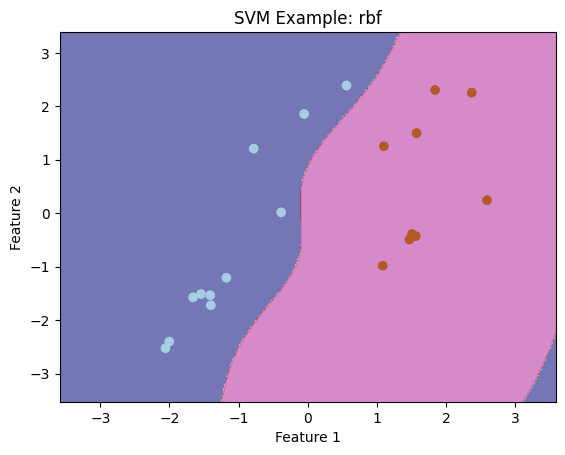

In [56]:
#import stuff
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#generate data with 100 samples with 2 features, where both are used (informative) and none don't contribute to the prediction (redundant = 0)
#random state is just there so it's consistent when running
#features is a 2d array, where each entry in the array is an array of two elements, where each element here is the data from a feature
#labels is a 1d array where each entry is the label for the corresponding data in the features array
features, labels = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state = 42)

#splits the features and labels array into two parts, where the first consists of 80% and the other consists of 20%
#the 80% is put into features_train and labels_train, which is for the training data for the SVM
#the 20% is put into features_test and labes_test, which is for testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#create svm classifier, the first one is the default, rbf (radial basis function)
svm_classifier = SVC(kernel='rbf')

#fit svm classifier into the training data (features_train and labels_train)
svm_classifier.fit(features_train, labels_train)

#using the data from training, use svm classifier to predict the labels for the data in features_test
label_predictions = svm_classifier.predict(features_test)

#since the correct labels for the data in features_test are in label_test, use accuracy_score to compare the actual labels with the predicted labels
prediction_accuracy = accuracy_score(labels_test, label_predictions)

#show accuracy
print("Prediction accuracy:", prediction_accuracy)

#plotting decision boundary
def plot_decision_boundary(features_test, labels_test, classifier): 
    #features[:, o] and features[:, 1] extract all the data from the first and second feature respectively
    #the min and max are then found to deduce the range of the data in each feature
    first_feature_min, first_feature_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    second_feature_min, second_feature_max = features[:, 1].min() - 1, features[:, 1].max() + 1

    #each feature is divided into parts, where the number of parts is min + step size until it reaches max
    step_size = 0.01
    first_feature_values = np.arange(first_feature_min, first_feature_max, step_size)
    second_feature_values = np.arange(second_feature_min, second_feature_max, step_size)

    #the first feature is taken as the x coordinates, and the second feature is taken as the y coordinates
    #x_coordnate_values is a 2d array where each row is a copy of first_feature_values, with len(first_feature_values) rows
    #y_coordinate values is a 2d array where each column is a copy of second_features_values, with len(second_features_values) columns
    x_coordinate_values, y_coordinate_values = np.meshgrid(first_feature_values, second_feature_values)

    #ravel turns the 2d arrays into 1d arrays, and the two arrays are combined using np.c_
    #this results in a 2d array where each element is an array of two elements, where the first element is for x and the second is for y
    #the classifier is used to predict the labels, and is put in label_predictions
    #it needs to be reshaped in accordance to either of x or y coordinate values because label_predictions will start as a 1d array
    label_predictions = classifier.predict(np.c_[x_coordinate_values.ravel(), y_coordinate_values.ravel()])
    label_predictions = label_predictions.reshape(x_coordinate_values.shape)

    #filling plot with colour, using tab20b colormaps because the colors look nice
    plt.contourf(x_coordinate_values, y_coordinate_values, label_predictions, cmap = plt.cm.tab20b, alpha = 0.8)

    #create scatterplot using the two features, coloring them according to their label, using the Paired colormaps
    plt.scatter(features_test[:, 0], features_test[:, 1], c = labels_test, cmap = plt.cm.Paired)

    #labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    title = "SVM Example: " + str(classifier.kernel)
    plt.title(title)

    #show the plot
    plt.show()

# Plot the decision boundary
plot_decision_boundary(features_test, labels_test, svm_classifier)


Prediction accuracy: 0.95


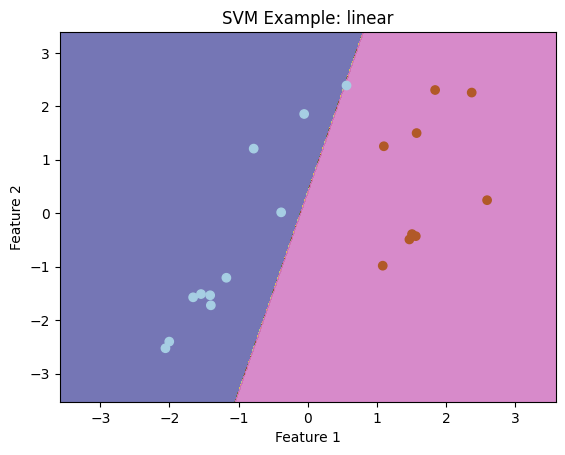

In [57]:
#using linear kernel

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(features_train, labels_train)

label_predictions = svm_classifier.predict(features_test)

prediction_accuracy = accuracy_score(labels_test, label_predictions)
print("Prediction accuracy:", prediction_accuracy)

plot_decision_boundary(features_test, labels_test, svm_classifier)

Prediction accuracy: 0.9


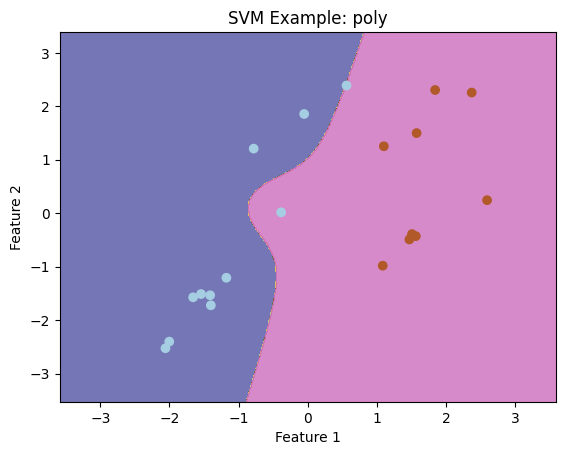

In [58]:
#using polynomial kernel

svm_classifier = SVC(kernel='poly')

svm_classifier.fit(features_train, labels_train)

label_predictions = svm_classifier.predict(features_test)

prediction_accuracy = accuracy_score(labels_test, label_predictions)
print("Prediction accuracy:", prediction_accuracy)

plot_decision_boundary(features_test, labels_test, svm_classifier)

Prediction accuracy: 0.95


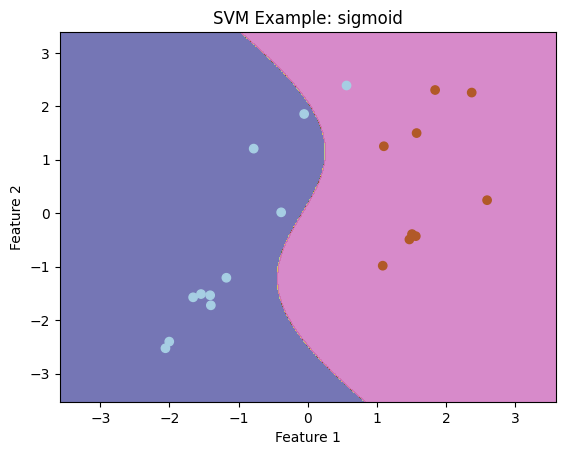

In [59]:
#using sigmoid kernel

svm_classifier = SVC(kernel='sigmoid')

svm_classifier.fit(features_train, labels_train)

label_predictions = svm_classifier.predict(features_test)

prediction_accuracy = accuracy_score(labels_test, label_predictions)
print("Prediction accuracy:", prediction_accuracy)

plot_decision_boundary(features_test, labels_test, svm_classifier)